In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/MVIG-SJTU/AlphaPose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q -b pytorch --depth 1 $git_repo_url
  !cd $project_name && pip install -q -r requirements.txt
  !pip install -q youtube-dl visdom
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

from IPython.display import YouTubeVideo

     |████████████████████████████████| 484.0MB 38kB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 686kB 43.2MB/s 
ERROR: Could not find a version that satisfies the requirement ntpath (from -r requirements.txt (line 9)) (from versions: none)
ERROR: No matching distribution found for ntpath (from -r requirements.txt (line 9))
     |████████████████████████████████| 1.8MB 7.1MB/s 
     |████████████████████████████████| 204kB 32.9MB/s 


In [2]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=$file_id" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=$confirm_text&id=$file_id" -o $file_name
  

  
pretrained_model_path = join(project_name, 'models/sppe/duc_se.pth')
if not exists(pretrained_model_path):
  # download the pretrained model
  download_from_google_drive('1OPORTWB2cwd5YTVBX-NE8fsauZJWsrtW', pretrained_model_path)
  
yolo_pretrained_model_path = join(project_name, 'models/yolo/yolov3-spp.weights')
if not exists(yolo_pretrained_model_path):
  # download the YOLO weights
  download_from_google_drive('1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC', yolo_pretrained_model_path)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1311      0 --:--:-- --:--:-- --:--:--  1307
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  227M    0  227M    0     0  67.0M      0 --:--:--  0:00:03 --:--:--  101M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1397      0 --:--:-- --:--:-- --:--:--  1397
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  240M    0  240M    0     0  55.6M      0 --:--:--  0:00:04 --:--:-- 88.2M


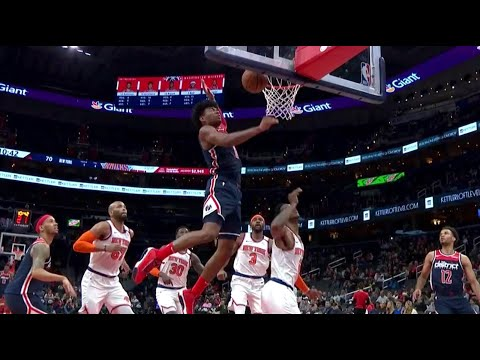

In [3]:
YOUTUBE_ID = 'tlC7G3zD_6U'


YouTubeVideo(YOUTUBE_ID)

In [4]:
!rm -df youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the 10 seconds
!ffmpeg -y -loglevel info -ss 8 -i youtube.mp4 -t 10 video.mp4
# run AlpaPose on these 10 seconds video
!rm -rf AlphaPose_video.avi
!cd $project_name && python3 video_demo.py --sp --video ../video.mp4 --outdir .. --save_video
# convert the result into MP4
!ffmpeg -y -loglevel info -i AlphaPose_video.avi AlphaPose_video.mp4

[youtube] tlC7G3zD_6U: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 208.98MiB in 01:37
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-li

In [5]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('AlphaPose_video.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.